#### TELECOM CUSTOMER CHURN : DATA 428 PROJECT
# 5.  TESTING THE EFFECTS OF REDUCED FEATURES BASED ON CONTINUITY FACTOR

    - This notebook allows features to be selected based on different thresholds of 'continuity factor' of the numeric values and thereafter go through the steps of data pre-procssing using Approach 1.
    - The data is log transformed before testing the effects of reduced numbers of features using best Random Forest and ADA Boost Models

In [176]:
import pandas as pd
import numpy as np
import scipy as sp 
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Looking at how continuous the data is ? Should it be treated it as continuous or as factor ? 

In [8]:
original_data = pd.read_csv("telecom_data_better_colnames.csv")

In [9]:
original_data.drop("Unnamed: 0", inplace = True, axis = 1)
#original_data.head()

In [5]:
numeric_df = original_data.corr()

In [10]:
list_numeric_cols = list(numeric_df.columns)
#original_data[list_numeric_cols].describe()

### Complete List of numeric features which are not continuous

In [11]:
list_of_numeric_factors = ["no_of_unique_subscribers_in_the_house",
                           "no_of_active_subscribers_in_house",
                           "no_of_handsets_issued",
                           "no_of_models_issued",
                           "no_of_adults_in_house",  
                           "estimated_income",
                           "length_of_residence", 
                           "truck_indicator",
                           "rv_indicator",
                           "foreign_travel_dummy_variable"]

In [12]:
numeric_features_set = set(list_numeric_cols) - set(list_of_numeric_factors)
numeric_features = list(numeric_features_set)
len(numeric_features)

69

##### Calculating the continuity factor while catering for the blanks 

In [13]:
total_values = len(original_data["avg_mthly_rev"]) - original_data["avg_mthly_rev"].isnull().sum()

In [14]:
len(original_data.avg_mthly_rev.unique())/total_values

0.376032435795791

In [15]:
features = []
continuity_factor = []
for feature in original_data[numeric_features]:
    features.append(feature)
    total_values = len(original_data[feature]) - original_data[feature].isnull().sum()
    con_factor = round(len(original_data[feature].unique())/total_values, 5)
    continuity_factor.append(con_factor)

In [16]:
continuity_df = pd.DataFrame({"features" : features, "continuity_factor" : continuity_factor})

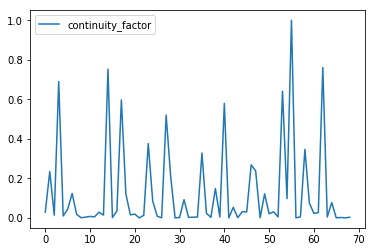

In [17]:
# Just an initial lokksee !
continuity_df.plot()

In [18]:
low_c_factor = continuity_df.loc[continuity_df["continuity_factor"] < 0.01]
#low_c_factor.head(5)

In [19]:
high_c_factor = continuity_df.loc[continuity_df["continuity_factor"] > 0.01]
#high_c_factor.head(5)

In [20]:
redundant_factor = continuity_df.loc[continuity_df["continuity_factor"] == 1]
redundant_factor

,features,continuity_factor
55,cust_id,1.0


In [28]:
discrete_factors = continuity_df.loc[continuity_df["continuity_factor"] < 0.01]
len(discrete_factors)

27

In [22]:
#set(discrete_factors.features)

In [27]:
list_redundant_numeric_features = list(set(discrete_factors.features) - set(['churn']))
len(list_redundant_numeric_features)

26

In [24]:
numeric_cols = [c for c in original_data[numeric_features] if c not in list_redundant_numeric_features]

In [25]:
len(numeric_cols)

43

In [29]:
cat_features = [c for c in original_data if c not in numeric_features]

In [30]:
len(cat_features)

31

In [31]:
new_list_of_features = numeric_cols + cat_features
len(new_list_of_features)

74

In [35]:
reduced_features_dataset = original_data[new_list_of_features]
reduced_features_dataset.shape

(100000, 74)

In [1]:
# Saving the file
#reduced_features_dataset.to_csv('reduced_features_dataset.csv')

### Plotting Continuity Factors

In [417]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [418]:
y_1 = high_c_factor["continuity_factor"]

#### Looking at the continuity of all features  
    - cut off line for one percepective kept at factor = 0.001 (i.e., 100 unique values in 100,000 observations)

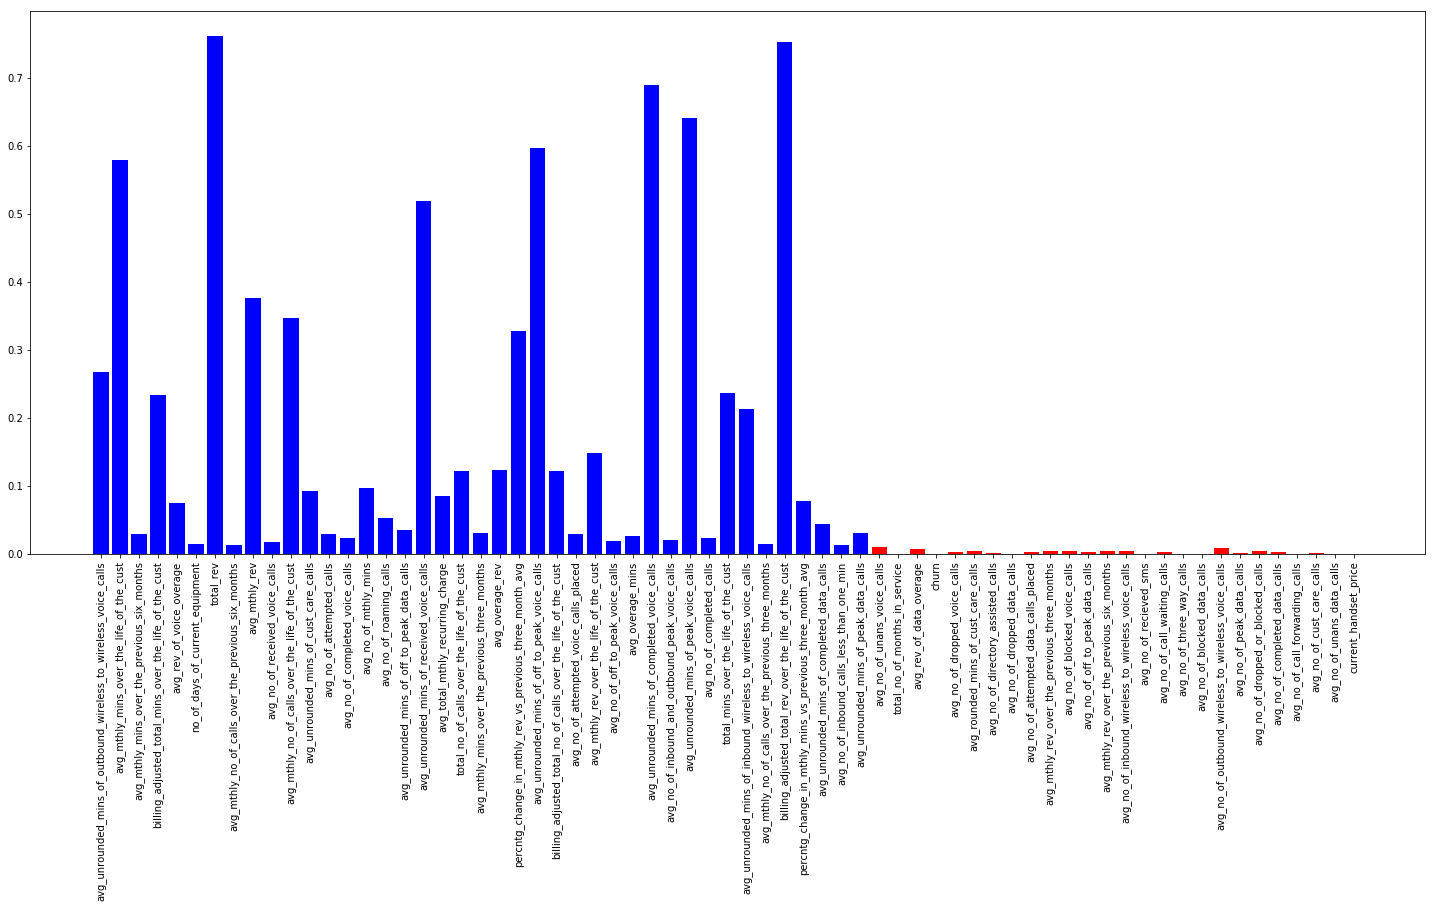

In [419]:
y_1 = np.array(high_c_factor.continuity_factor)
y_2 = np.array(low_c_factor.continuity_factor)
y_3 = np.array(redundant_factor.continuity_factor)

x_1 = np.array(high_c_factor.features)
x_2 = np.array(low_c_factor.features)
x_3 = np.array(redundant_factor.features)

#colors = cm.hsv(X=1)
#colors = cm.hsv(y / float(max(y)))
plt.figure(figsize=(25,10))
#plt.colorbar(plot)
#plt.hlines(y_1=0.1, xmin = 0, xmax = 99 )
plt.xticks(rotation=90)
plt.bar(x_1, y_1, color = 'Blue' )
plt.bar(x_2, y_2, color = 'Red' )
plt.bar(x_3, y_3, color = 'Orange' )
#plt.savefig('continuity_plot.png')
plt.show()

### A Closer look at the low continuity fetaures

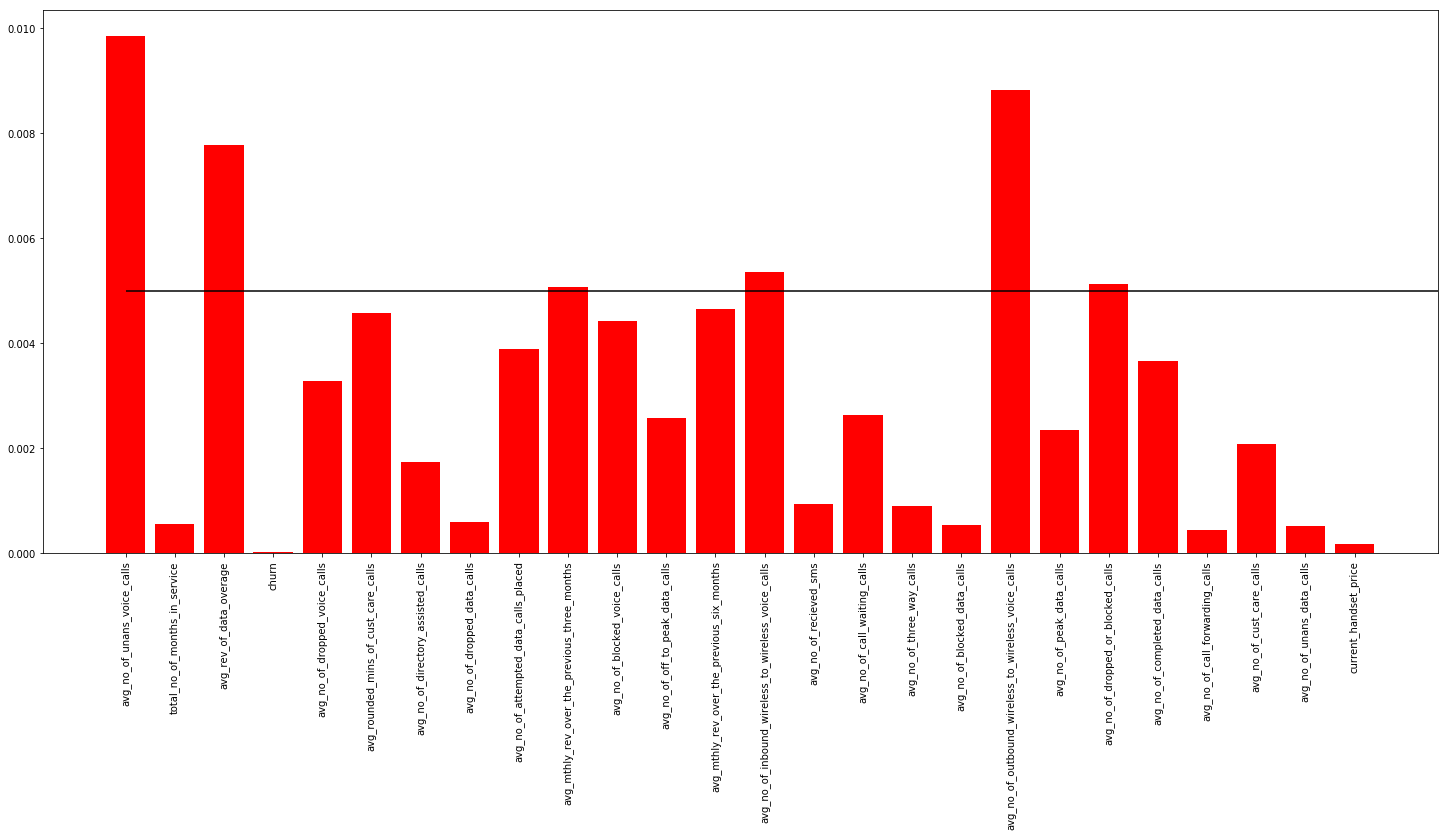

In [421]:
## 

y = np.array(low_c_factor.continuity_factor)
x = np.array(low_c_factor.features)
#colors = cm.hsv(y / float(max(y)))
plt.figure(figsize=(25,10))
#plot = plt.scatter(y, y, c = y, cmap = 'hsv')
#plt.clf()
#plt.colorbar(plot)
plt.hlines(y=0.005, xmin = 0, xmax = 66 )
plt.xticks(rotation=90)
plt.bar(x, y, color = 'red')
#plt.savefig('low_continuity_plot.jpg')
plt.show()

### READING DATASET WITH REDUCED FEATURES

In [182]:
#https://stackoverflow.com/questions/45274183/matplotlib-different-colors-for-bar-graph-based-on-value

In [36]:
#data = pd.read_csv("reduced_features_dataset.csv")

In [37]:
#data.drop('Unnamed: 0', axis=1, inplace=True)

In [38]:
#data.shape

(100000, 74)

## Data Wrangling - following issues to be addressed
    - 'geographic_area' : names can be made better to avoid errors (learnt after making mistakes initially)
    - drop rows with outliers 
    - drop columns with very high 'nan' / blanks
    - drop columns like 'child_between_0_to_2_years_in_house' 

In [40]:
data["geogrpahic_area"].unique()

array(['NORTHWEST/ROCKY MOUNTAIN AREA', 'CHICAGO AREA',
       'GREAT LAKES AREA', 'NEW ENGLAND AREA', 'DALLAS AREA',
       'CENTRAL/SOUTH TEXAS AREA', 'TENNESSEE AREA', 'MIDWEST AREA',
       'PHILADELPHIA AREA', 'OHIO AREA', 'HOUSTON AREA', 'SOUTHWEST AREA',
       'NEW YORK CITY AREA', 'ATLANTIC SOUTH AREA', 'SOUTH FLORIDA AREA',
       'CALIFORNIA NORTH AREA', 'DC/MARYLAND/VIRGINIA AREA',
       'NORTH FLORIDA AREA', nan, 'LOS ANGELES AREA'], dtype=object)

In [41]:
geo_area = []
for i in range(len(data)):
    item = data["geogrpahic_area"][i]
    #print(item)
    if type(item) is float:
        geo_area.append(item)
        #print(item)
    else:
        name = item.replace(' ', '_')
        name = name.replace('/', '_')
        geo_area.append(name)

In [42]:
data.drop("geogrpahic_area", inplace=True, axis=1)

In [43]:
data["geogrpahic_area"] = geo_area

In [44]:
data["geogrpahic_area"].unique()

array(['NORTHWEST_ROCKY_MOUNTAIN_AREA', 'CHICAGO_AREA',
       'GREAT_LAKES_AREA', 'NEW_ENGLAND_AREA', 'DALLAS_AREA',
       'CENTRAL_SOUTH_TEXAS_AREA', 'TENNESSEE_AREA', 'MIDWEST_AREA',
       'PHILADELPHIA_AREA', 'OHIO_AREA', 'HOUSTON_AREA', 'SOUTHWEST_AREA',
       'NEW_YORK_CITY_AREA', 'ATLANTIC_SOUTH_AREA', 'SOUTH_FLORIDA_AREA',
       'CALIFORNIA_NORTH_AREA', 'DC_MARYLAND_VIRGINIA_AREA',
       'NORTH_FLORIDA_AREA', nan, 'LOS_ANGELES_AREA'], dtype=object)

In [61]:
data.shape

(99999, 73)

#### no_of_unique_subscribers_in_the_house 
    - This feature has numeric discrete values and some outliers like 196 unique users in a house.
    - It's either a wrong entry or a 'close user group' (CUG) scenario of an organisation. 
    - Hence, dropping any entry with more than 20 subscribers in the house (making concessions for a hostel)

In [50]:
data['no_of_unique_subscribers_in_the_house'].unique()

array([  2,   1,   3,   5,   4,   6,   7,   9,   8,  12,  11,  10,  13,
        18, 196], dtype=int64)

In [51]:
for i in range(len(data)): 
    
    value = data['no_of_unique_subscribers_in_the_house'][i]
       
    if value > 20:
        data.drop(data.index[i], inplace = True)   
data = data.reset_index()
data.drop('index', axis = 1, inplace=True)

#         no_of_unique_subscribers.append('low')
#     elif value > 2 and value < 7:
#         no_of_unique_subscribers.append('medium')
#     else:
#         no_of_unique_subscribers.append('high')

In [52]:
for i in range(len(data)): 
    
    value_2 = data['no_of_active_subscribers_in_house'][i]
       
    if value_2 > 20:
        data.drop(data.index[i], inplace = True)    
        
data = data.reset_index()
data.drop('index', axis = 1, inplace=True)   

In [62]:
data.shape

(99999, 73)

### FEATURES WITH 'U'  : Assuming 'U' to be 'Unknown' or 'Missing Value'

    - new_cell_phone_user : 66.9% 'U' values, which are as good as missing values
    - dualband :  "Y", "N", "T", "U".  Where 'U' is only 0.02%

In [63]:
data.new_cell_phone_user.value_counts()

U    66913
Y    19301
N    13785
Name: new_cell_phone_user, dtype: int64

In [64]:
data.drop('new_cell_phone_user', inplace=True, axis = 1)

In [65]:
# Need to decide - what to do with 'U'
data.dualband.value_counts()

Y    72264
N    23196
T     4316
U      222
Name: dualband, dtype: int64

In [66]:
data['dualband'] = data['dualband'].str.replace('U','Y')

In [67]:
# need to decide what to do with 'UNKW'
data.handset_web_capability.value_counts()

WCMB    75732
WC      13843
UNKW      235
Name: handset_web_capability, dtype: int64

In [68]:
data['handset_web_capability'] = data['handset_web_capability'].str.replace('UNKW', 'WCMB')

In [69]:
data.handset_web_capability.value_counts()

WCMB    75967
WC      13843
Name: handset_web_capability, dtype: int64

In [70]:
# Leaving 'U' as such because no information is available about the categories.
data.marital_status.value_counts()

U    37332
M    31052
S    17627
B     7116
A     5140
Name: marital_status, dtype: int64

### Dropping five columns of 'children in house' as data very sparse and not clear

In [71]:
list_of_children = ['child_0_to_2_yrs_in_house', 'child_3_to_5_yrs_in_house',
                   'child_6_to_10_yrs_in_house', 'child_11_to_15_yrs_in_house',
                   'child_16_to_17_yrs_in_house']

In [72]:
#redundant_unknown_features = ["truck_indicator", "rv_indicator", "foreign_travel_dummy_variable", "infobase_match"]

In [73]:
def drop_feature(drop_list):
    for feature in drop_list:
        data.drop(feature, inplace=True, axis = 1)

In [74]:
drop_feature(list_of_children)

In [75]:
#drop_feature(redundant_unknown_features)

In [76]:
data.shape

(99999, 67)

### Moving towards Separating columns which appear numeric (continuous), but are actually factors or discrete numbers

In [80]:
numeric_df = data.corr()

In [81]:
list_numeric_cols = list(numeric_df.columns)
data[list_numeric_cols].describe()

,avg_no_of_attempted_calls,billing_adjusted_total_mins_over_the_life_of_the_cust,avg_mthly_no_of_calls_over_the_previous_six_months,avg_unrounded_mins_of_completed_voice_calls,avg_unrounded_mins_of_completed_data_calls,avg_overage_rev,avg_no_of_received_voice_calls,avg_no_of_attempted_voice_calls_placed,avg_mthly_no_of_calls_over_the_previous_three_months,billing_adjusted_total_rev_over_the_life_of_the_cust,...,no_of_unique_subscribers_in_the_house,no_of_active_subscribers_in_house,no_of_handsets_issued,no_of_models_issued,truck_indicator,rv_indicator,length_of_residence,no_of_adults_in_house,estimated_income,foreign_travel_dummy_variable
count,99999.000000,99999.000000,97160.000000,99999.000000,99999.000000,99642.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99998.000000,99998.000000,98267.000000,98267.000000,69810.000000,76981.000000,74564.000000,98267.000000
mean,145.753683,7546.351652,178.366828,227.765797,1.844054,13.559696,55.085703,144.883125,180.339123,960.111883,...,1.546195,1.358444,1.787126,1.545831,0.188822,0.082581,6.177238,2.530326,5.783112,0.057975
std,159.348224,8594.924760,182.724763,264.404235,23.733344,30.501008,86.841458,158.267839,192.725955,840.175009,...,0.882077,0.634892,1.313981,0.898398,0.391369,0.275249,4.735267,1.452819,2.182132,0.233697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,38.333333,2474.000000,59.000000,49.053333,0.000000,0.000000,5.333333,38.333333,55.000000,452.180000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000
50%,101.000000,5103.000000,127.000000,146.203333,0.000000,1.000000,26.666667,100.333333,125.000000,737.760000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,0.000000
75%,199.666667,9661.000000,237.000000,309.478333,0.000000,14.437500,71.333333,198.666667,240.000000,1188.180000,...,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,0.000000
max,2289.000000,232855.100000,3256.000000,4514.453333,3032.050000,1102.400000,3369.333333,2289.000000,3909.000000,27071.300000,...,18.000000,11.000000,28.000000,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,1.000000


### Complete List of numeric features which are not continuous

    - List used for imputing with 'mode' for these features

In [82]:
list_of_numeric_factors = ["no_of_unique_subscribers_in_the_house",
                           "no_of_active_subscribers_in_house",
                           "no_of_handsets_issued",
                           "no_of_models_issued",
                           "no_of_adults_in_house",  
                           "estimated_income",
                           "length_of_residence", 
                           "truck_indicator",
                           "rv_indicator",
                           "foreign_travel_dummy_variable"]

In [83]:
numeric_features_set = set(list_numeric_cols) - set(list_of_numeric_factors)
numeric_features = list(numeric_features_set)
len(numeric_features)

42

In [84]:
categorical_features_set = set(list(data.columns)) - set(list_numeric_cols)
categorical_features = list(categorical_features_set)
len(categorical_features)

15

In [85]:
cat_required = ["AA", "A", "BA", "CA", "EA"]
cat_with_others = []

for i in range(len(data)):
    cat = data.credit_class_code[i]
    
    if cat in cat_required:
        cat_with_others.append(cat)
        
    if cat not in cat_required:
        cat_with_others.append("others")
    

In [86]:
data.credit_class_code = cat_with_others

In [87]:
ethnicity_code = []
ethnicity_code_required = ["X", "P", "M", "R", "D", "B", "F"]

for i in range(len(data)):
    cat = data.ethnicity_roll_to_up_code[i]
    
    if cat in ethnicity_code_required:
        ethnicity_code.append("others")
        
    if cat not in ethnicity_code_required:
        ethnicity_code.append(cat)
        

In [88]:
data['ethnicity_roll_to_up_code'] = ethnicity_code

In [89]:
data['ethnicity_roll_to_up_code'].unique()

array(['N', 'Z', 'U', 'I', 'S', 'others', 'J', 'H', 'G', 'O', nan, 'C'],
      dtype=object)

In [90]:
data.credit_class_code.unique()

array(['A', 'EA', 'others', 'BA', 'CA', 'AA'], dtype=object)

In [91]:
data.shape

(99999, 67)

### Log Transformation of Numeric Data

In [93]:
numeric_cols = [c for c in numeric_features if c not in ["churn"]]

In [94]:
numeric_df = data[numeric_cols]
numeric_df.head()

,avg_no_of_attempted_calls,billing_adjusted_total_mins_over_the_life_of_the_cust,avg_mthly_no_of_calls_over_the_previous_six_months,avg_unrounded_mins_of_completed_voice_calls,avg_unrounded_mins_of_completed_data_calls,avg_overage_rev,avg_mthly_rev_over_the_life_of_the_cust,avg_no_of_received_voice_calls,avg_no_of_attempted_voice_calls_placed,avg_mthly_no_of_calls_over_the_previous_three_months,...,avg_unrounded_mins_of_inbound_wireless_to_wireless_voice_calls,avg_mthly_no_of_calls_over_the_life_of_the_cust,avg_unrounded_mins_of_cust_care_calls,avg_rev_of_voice_overage,avg_no_of_completed_voice_calls,avg_overage_mins,total_rev,percntg_change_in_mthly_mins_vs_previous_three_month_avg,percntg_change_in_mthly_rev_vs_previous_three_month_avg,avg_no_of_completed_calls
0,52.333333,4085.00,136.0,90.643333,0.0,0.0,29.66,42.333333,52.333333,116,...,0.000000,32.69,0.000000,0.0,45.000000,0.00,1504.62,-157.25,-18.9975,45.000000
1,263.333333,26367.00,275.0,189.396667,0.0,9.1,51.53,69.000000,263.333333,158,...,3.696667,265.89,5.463333,9.1,193.333333,22.75,2851.68,532.25,50.9875,193.333333
2,9.000000,24303.05,6.0,5.426667,0.0,0.0,34.54,0.333333,9.000000,7,...,0.000000,140.86,0.000000,0.0,6.000000,0.00,2155.91,-4.25,0.0000,6.000000
3,3.666667,3035.00,25.0,8.410000,0.0,0.0,40.45,1.333333,3.666667,3,...,0.000000,30.81,0.000000,0.0,3.666667,0.00,2000.90,-1.50,0.0000,3.666667
4,222.333333,13965.00,196.0,285.233333,0.0,0.0,38.69,94.666667,222.333333,191,...,0.366667,79.50,11.076667,0.0,137.000000,0.00,2181.12,38.50,0.0000,137.000000


#### Histograms

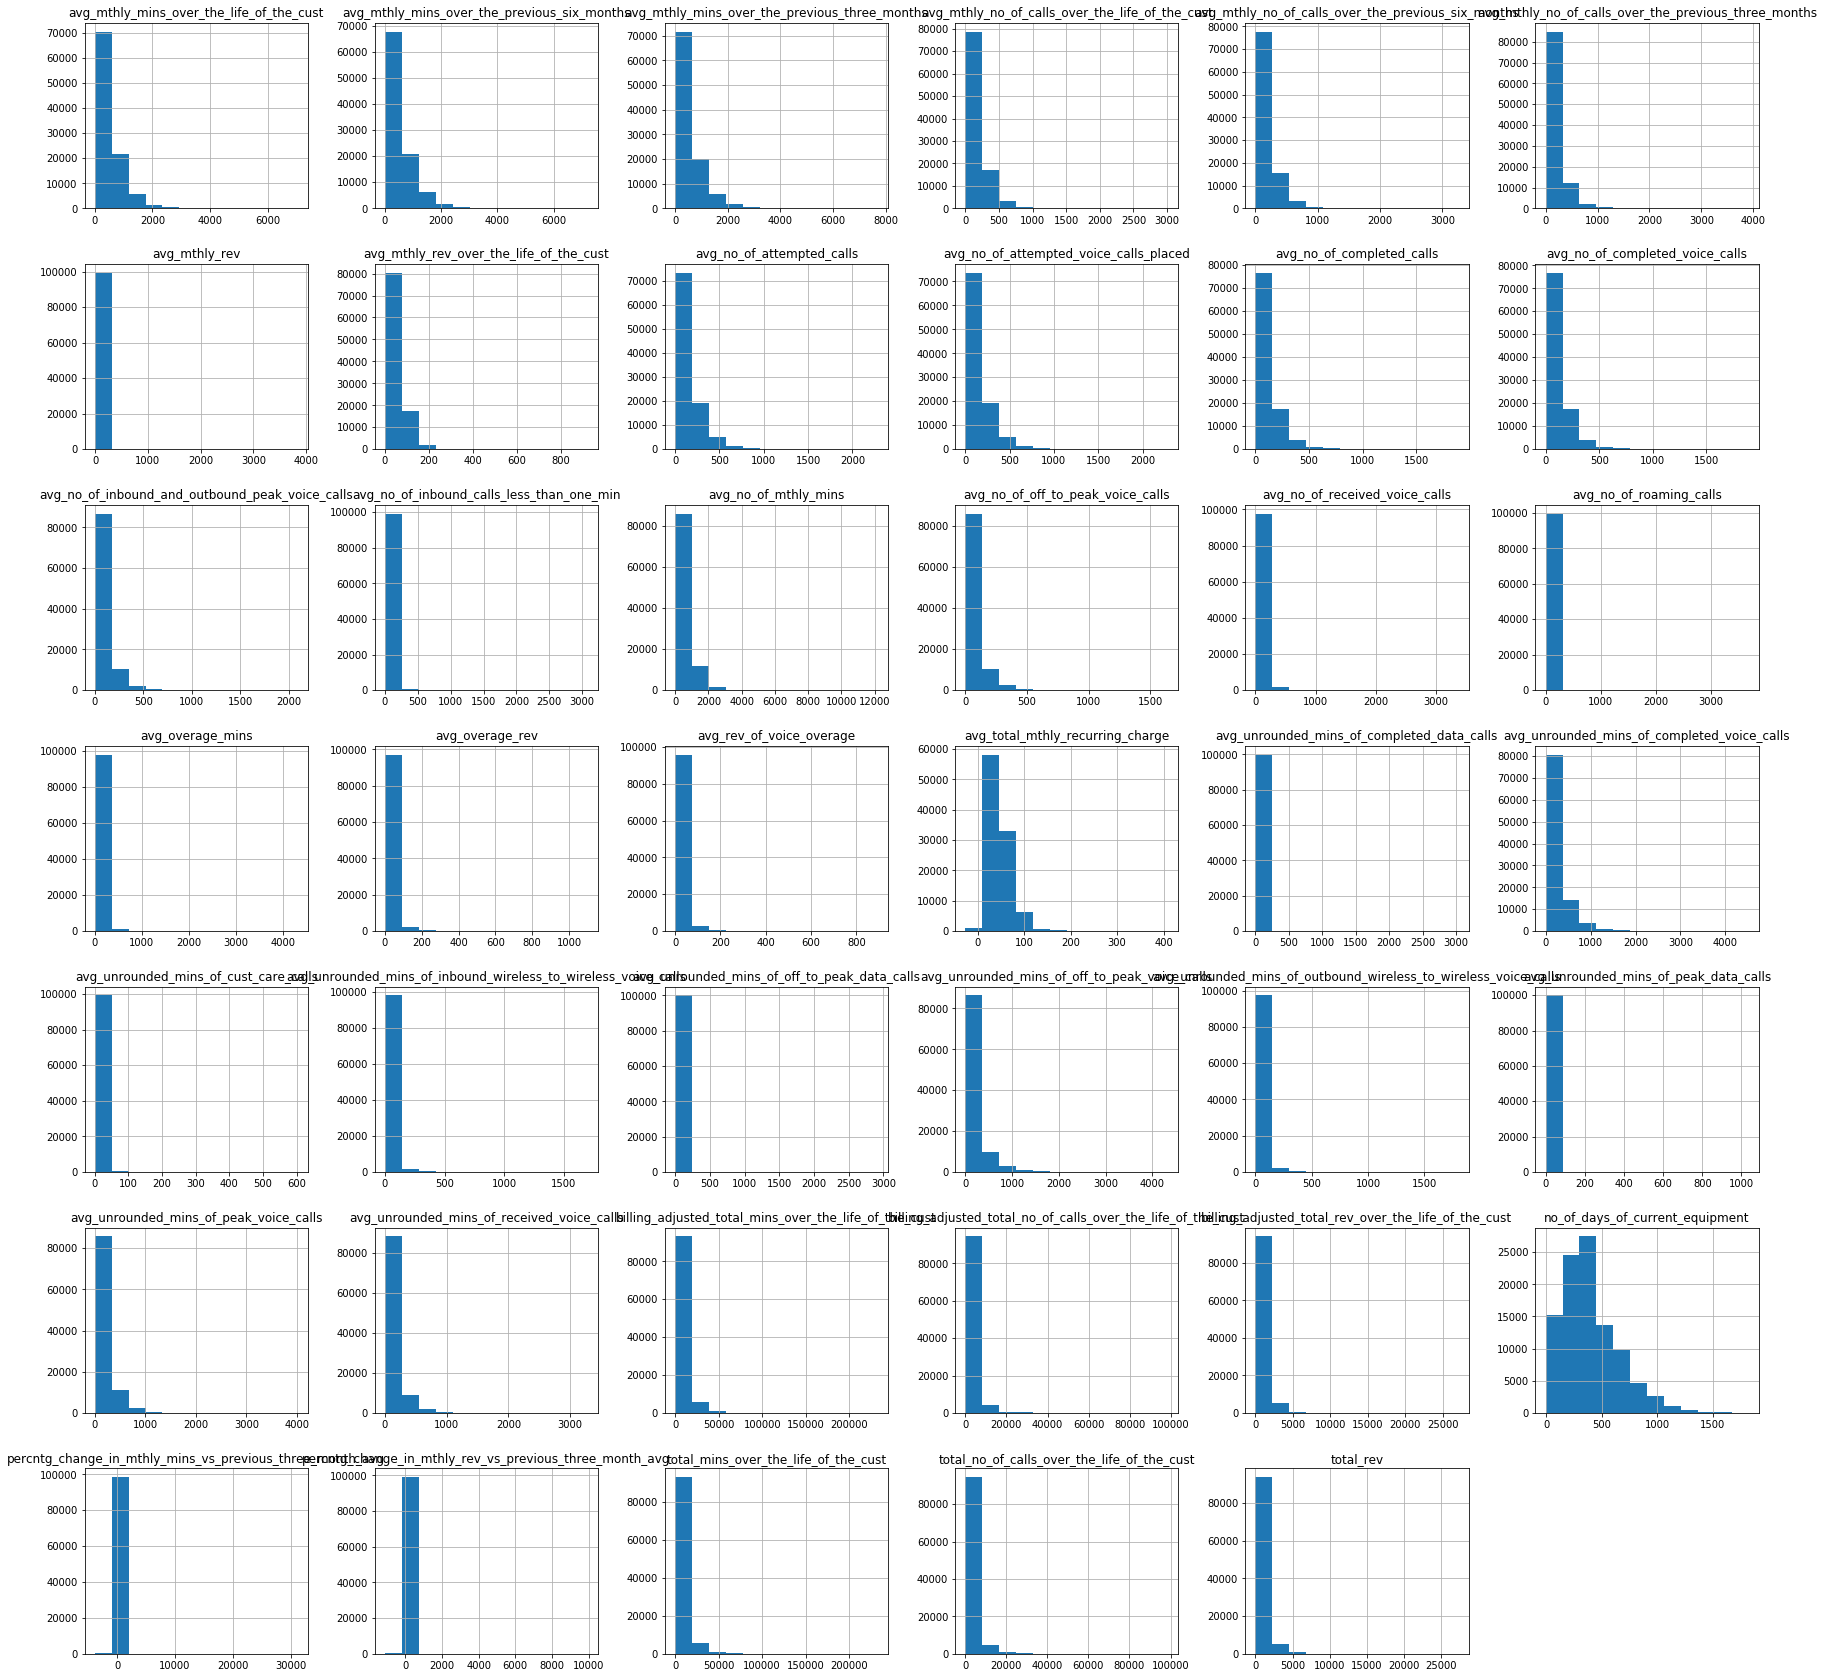

In [95]:
numeric_df.hist(bins=12, figsize=(30,30))
#plt.savefig('Histograms of Numeric data.jpeg')

In [79]:
#numeric_df.describe().T

### Discarding Negative Value Columns - to apply Log Transform

In [96]:
positive_df = numeric_df.loc[:, numeric_df.min() >= 0]

In [97]:
len(positive_df.columns)

36

In [98]:
positive_df = np.log2(positive_df + 0.01)
#positive_df.head()

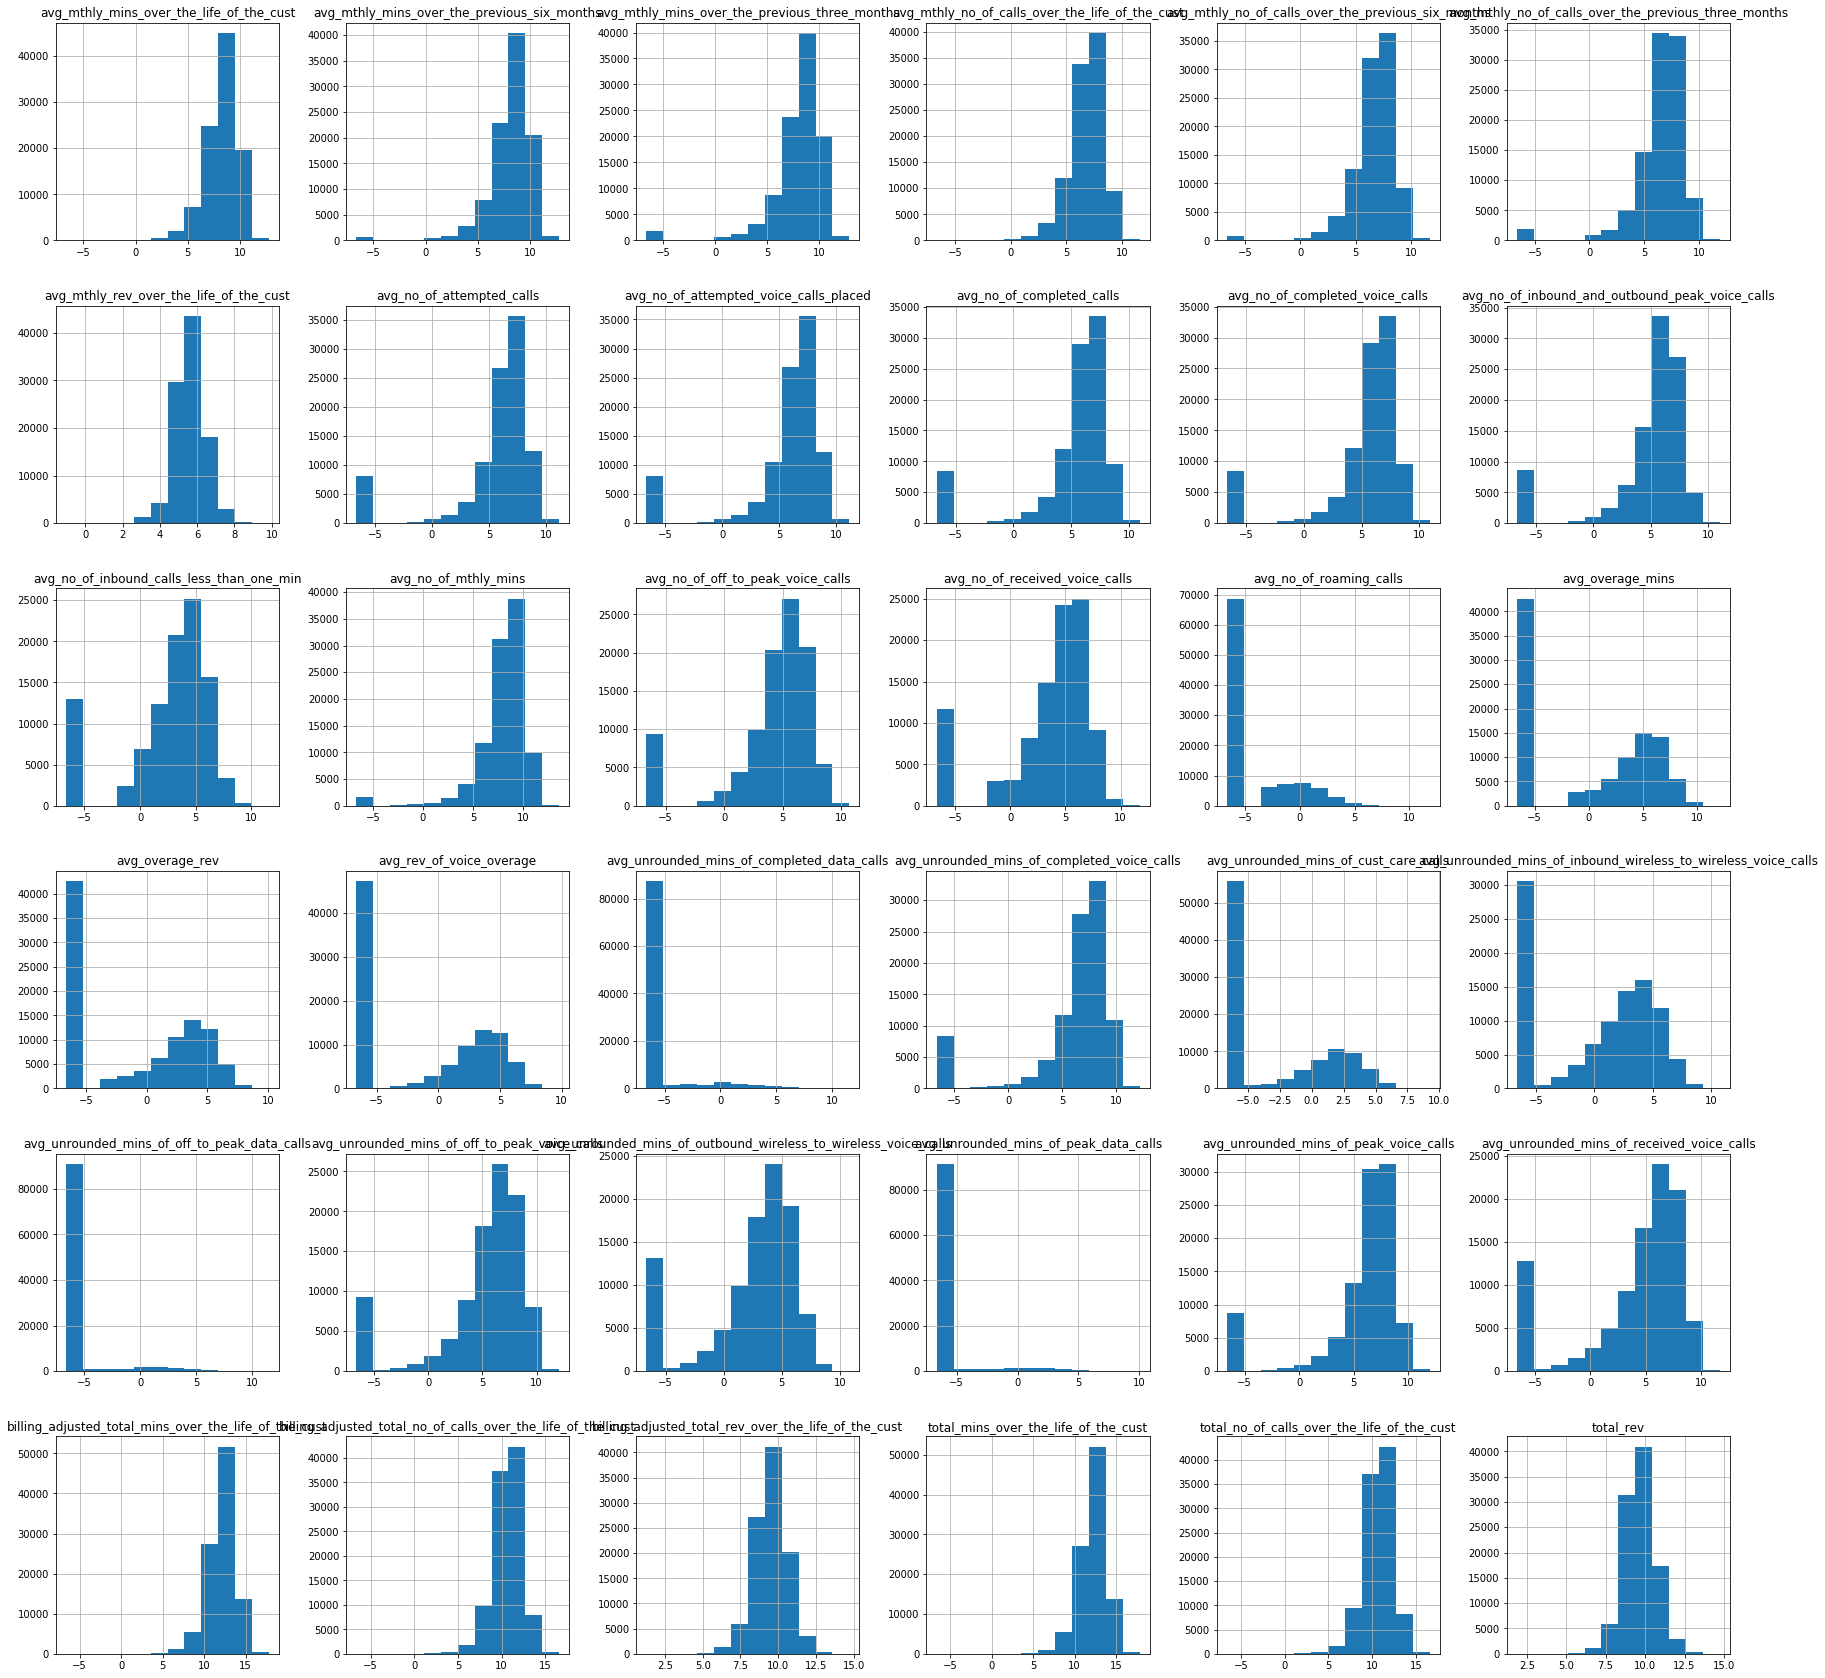

In [99]:
positive_df.hist(bins=12, figsize=(30,30))
#plt.savefig('Poistive_df Histograms of Numeric data.jpeg')

#### Creating a Dataset With Log of 61 Numeric Values for Building the Models

In [102]:
for features in positive_df:
    if features in data:
        data[features] = positive_df[features]

In [103]:
data_after_log = data#[0:30000]

In [104]:
data_after_log.shape

(99999, 67)

### Creating Train & Test Datasets

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
train_x, test_x, train_y, test_y = train_test_split(data_after_log.drop(['churn'],
                                                axis=1),data_after_log.churn, test_size = 0.20)

### A function to impute the numeric features in train_x with median and categorical values with mode.
    - did not separate out columns with missing values to keep the code simple.
    - train_y does not have any missing values
    - test sets do not have to be imputed
    - For the purpose of imputing : treating 32 features including 'estimated_income' having '1 to 9' values as categorical to impute with mode.

In [107]:
train_x.shape

(79999, 66)

In [108]:
test_x.shape

(20000, 66)

### main function to impute the training and test set

In [109]:
for feature in train_x:
    if feature in numeric_features:
        train_x[feature] = train_x[feature].fillna(train_x[feature].median())
        test_x[feature] = test_x[feature].fillna(train_x[feature].median())
    elif feature in categorical_features:
        #train_x[feature] = train_x[feature].fillna(str(cat_df_for_mode[features].mode()).split()[1])
        
        mode_val = str(train_x[feature].mode()).split()[1]
        train_x[feature] = train_x[feature].fillna(mode_val)
        test_x[feature] = test_x[feature].fillna(mode_val)
        
    elif feature in list_of_numeric_factors:
        #train_x[feature] = train_x[feature].fillna(str(cat_df_for_mode[features].mode()).split()[1])
        
        mode_val = float(str(train_x[feature].mode()).split()[1])
        train_x[feature] = train_x[feature].fillna(mode_val)
        test_x[feature] = test_x[feature].fillna(mode_val)

In [110]:
#data.credit_class_code.value_counts()

In [111]:
test_x.shape

(20000, 66)

In [112]:
# Checking the train_x for correct imputations.  It can also be used for checking the 'nan' in test_x
nulls_in_df = test_x.isnull().sum()
nulls_in_df.head(5)

avg_no_of_attempted_calls                                0
billing_adjusted_total_mins_over_the_life_of_the_cust    0
avg_mthly_no_of_calls_over_the_previous_six_months       0
avg_unrounded_mins_of_completed_voice_calls              0
avg_unrounded_mins_of_completed_data_calls               0
dtype: int64

In [113]:
# Checking test data for not having all 20000 balnks. There are only two features with 7000 plus blanks.
# x = test_x.isnull().sum()
# for i in range(len(x)):
#     if x[i]>7000:
#         print(x[i])

In [114]:
# Checking out if there is any feature in test set which has not been represented.
# There are two features with only three values. (There is none with zero representation as of now)
# Will need to check again, if the data split again.

# for feature in test_x:
#     if len(test_x[feature].unique()) == 2:
#         print(feature)

### Option 3 : Creating Dummy Variables for Categorical Data and creating a full dataset.

In [115]:
from sklearn import preprocessing

In [116]:
to_be_considered_cat = ["truck_indicator",
                        "rv_indicator",
                        "foreign_travel_dummy_variable"]

# All not being removed as some are ordered and have more values

In [117]:
to_be_considered_numeric = ["no_of_unique_subscribers_in_the_house",
                "no_of_active_subscribers_in_house",
                "no_of_handsets_issued",
                "no_of_models_issued",
                "estimated_income",
                "length_of_residence",
                "no_of_adults_in_house"]

#### Need to remove the to_be_numeric features from 'categorical_features' list before creating dummy variables

In [118]:
categorical_list = list(set(categorical_features) - set(to_be_considered_numeric))
len(categorical_list)

15

In [119]:
len(list_numeric_cols) + len(categorical_features) 
#- len(to_be_considered_numeric) - len(to_be_considered_cat)

67

In [120]:
def create_dummies(dataset):
    categorical_df = dataset[categorical_list]
    print("shape of the Dataset :", categorical_df.shape)
    
    dummies_df_starter = pd.get_dummies(categorical_df.credit_card_indicator, prefix="credit_card_indicator_", drop_first=True)
    
    for feature in categorical_df:
        #print(feature)
        cat_dummies = pd.get_dummies(categorical_df[feature], prefix=feature+'_', drop_first=True)
        #print(len(cat_dummies))
        dummies_df_starter = pd.concat([dummies_df_starter, cat_dummies], axis = 1)
        #print(dummies_df_starter.shape)
        
    dummies_df_starter.drop('credit_card_indicator__Y', inplace = True, axis = 1)
    
    credit_card_feature = pd.get_dummies(categorical_df.credit_card_indicator, prefix="credit_card_indicator_", drop_first=True)
    
    cat_df_with_dummies = pd.concat([dummies_df_starter, credit_card_feature], axis = 1)
    
    
    df_numeric_list = list(set(dataset.columns) - set(categorical_list))
    df_numeric = dataset[df_numeric_list]
    print("shape of df_numeric : ", df_numeric.shape)
    full_df_with_dummies = pd.concat([df_numeric, cat_df_with_dummies], axis=1)
    print("full_df_with_dummies : ", full_df_with_dummies.shape)
    return full_df_with_dummies

#### Creating a new df to build up the dummy features of each categorical feature

#### Adding dummy variables for each categorical variable

In [121]:
train_x = create_dummies(train_x)

shape of the Dataset : (79999, 15)
shape of df_numeric :  (79999, 51)
full_df_with_dummies :  (79999, 120)


In [122]:
#train_x.to_csv("log_train_x.csv")

In [123]:
test_x = create_dummies(test_x)

shape of the Dataset : (20000, 15)
shape of df_numeric :  (20000, 51)
full_df_with_dummies :  (20000, 120)


In [124]:
#test_x.to_csv("log_test_x.csv")

####  Data Preparation Ends Here

##  MODELS

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [130]:
import numpy as np
import pandas as pd
from scipy import interp
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, neighbors, svm, calibration, tree, ensemble, cross_validation
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import metrics
#not great but suppressess warning messages 
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [131]:
from sklearn.model_selection import check_cv
from sklearn.model_selection._validation import _fit_and_score
from sklearn.metrics.scorer import check_scoring

In [132]:
# cross_validation depreciated, so use this
#from sklearn.model_selection import cross_validate

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### K-Best Feature Selection For Selecting Best Set of Features  : In case required, can be used to further check the features being selected in this flow

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Perform feature selection
selector = SelectKBest(f_classif, k=27)       #f_classif ,  chi2
selector = selector.fit(train_x,train_y)
#selector.pvalues_.shape
selector.pvalues_[selector.get_support(1)]

In [160]:
# selecting only top 25 features and will build model on these variables
feature = selector.get_support(1)
k_best_list = list(train_x.columns[selector.get_support(1)])

In [3]:
#k_best_list

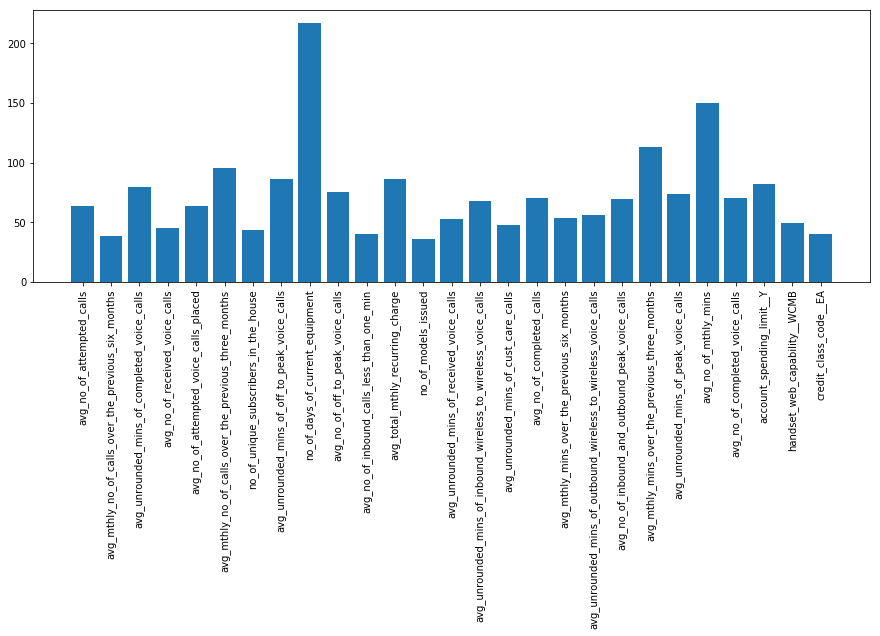

In [162]:
#plotting top 25 value to see the importance of each variable
scores = -np.log10(selector.pvalues_[selector.get_support(1)])

plt.figure(figsize=(15,5))
plt.bar(range(len(train_x.columns[selector.get_support(1)])), scores)
plt.xticks(range(len(train_x.columns[selector.get_support(1)])), train_x.columns[selector.get_support(1)], rotation='vertical')

plt.show()

### Code for ROC plot

In [163]:
def plot_roc(model, test_x_data, test_y_data):
    y_predict_prob = model.predict_proba(test_x_data)
    fpr, tpr, _ = metrics.roc_curve(test_y_data,y_predict_prob[:,1])
    roc_curve = metrics.auc(fpr,tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_curve)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#### FOR CONFUSION MATRIX

In [164]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
class_names = data.churn

In [165]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

### Best Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rf = RandomForestClassifier(bootstrap=True, n_estimators=2500, max_features='sqrt')

In [169]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
y_pred = rf.predict(test_x)

In [171]:
metrics.confusion_matrix(y_pred, test_y)

array([[6325, 3808],
       [3781, 6086]], dtype=int64)

In [172]:
print(metrics.classification_report(y_pred, test_y))

             precision    recall  f1-score   support

          0       0.63      0.62      0.63     10133
          1       0.62      0.62      0.62      9867

avg / total       0.62      0.62      0.62     20000



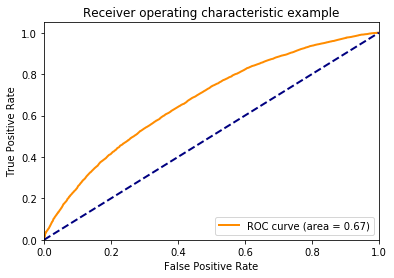

In [173]:
plot_roc(rf, test_x, test_y)

In [174]:
metrics.cohen_kappa_score(y_pred, test_y)

0.2409929951924623

Normalized confusion matrix
[[0.63 0.37]
 [0.38 0.62]]


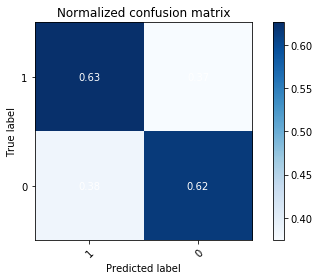

In [175]:
plot_confusion_matrix(test_y, y_pred, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

plt.show()

#### Feature Selection Using Random Forest - In case required to see the features being selected in this flow

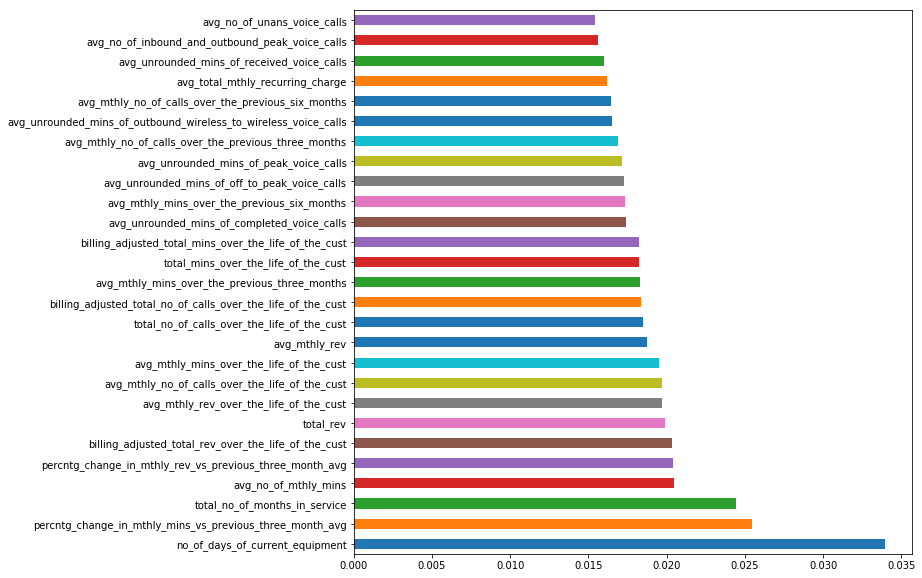

In [158]:
feat_imp = pd.Series(rf.feature_importances_, index = train_x.columns)
feat_imp.nlargest(27).plot(kind = "barh", figsize = (10, 10))

In [159]:
feat_imp = pd.DataFrame(feat_imp)

In [160]:
rf_feat_imp_list = list(feat_imp.T.columns)

### ADA BOOST

In [173]:
from sklearn.ensemble import AdaBoostClassifier

In [174]:
ada = AdaBoostClassifier(n_estimators= 1000,  learning_rate= 1)

In [175]:
ada.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=1000, random_state=None)

In [176]:
y_pred = ada.predict(test_x)

In [177]:
metrics.confusion_matrix(y_pred, test_y)

array([[6247, 3667],
       [3797, 6289]], dtype=int64)

In [178]:
print(metrics.classification_report(y_pred, test_y))

             precision    recall  f1-score   support

          0       0.62      0.63      0.63      9914
          1       0.63      0.62      0.63     10086

avg / total       0.63      0.63      0.63     20000



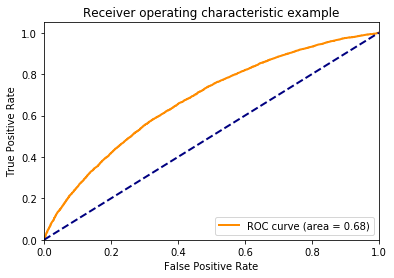

In [180]:
plot_roc(ada, test_x, test_y)

In [181]:
metrics.cohen_kappa_score(y_pred, test_y)

0.2536282427072959

Normalized confusion matrix
[[0.63 0.37]
 [0.36 0.64]]


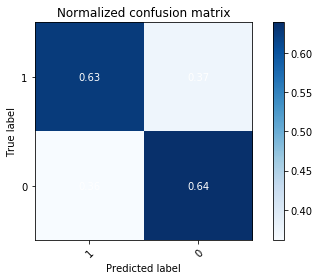

In [345]:
# plot_confusion_matrix(test_y, y_pred,                                            
#                       title='Confusion matrix, without normalization') #classes=class_names,

# Plot normalized confusion matrix
plot_confusion_matrix(test_y, y_pred, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

plt.show()

## This Note Book Ends Here